In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('E:/csv_files/heart.csv')
# data.columns
data.rename(columns={'cp':'Chest_pain'},inplace=True)
data.rename(columns={'trestbps':'Resting_bp'},inplace=True)
data.rename(columns={'chol':'Serium_clostrole'},inplace=True)
data.rename(columns={'fbs':'Fasting_bloodsugar'},inplace=True)
data.rename(columns={'restecg':'Electro_cardio'},inplace=True)
data.rename(columns={'thalach':'Max_heartrate'},inplace=True)
data.rename(columns={'exang':'Exercise_induced_angina'},inplace=True)
data.rename(columns={'oldpeak':'Depression'},inplace=True)
data.rename(columns={'target':'Heart_attack'},inplace=True)

# What is in the data of heart disease
data.columns

Index(['age', 'sex', 'Chest_pain', 'Resting_bp', 'Serium_clostrole',
       'Fasting_bloodsugar', 'Electro_cardio', 'Max_heartrate',
       'Exercise_induced_angina', 'Depression', 'slope', 'ca', 'thal',
       'Heart_attack'],
      dtype='object')

In [20]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1025 non-null   int64  
 1   sex                      1025 non-null   int64  
 2   Chest_pain               1025 non-null   int64  
 3   Resting_bp               1025 non-null   int64  
 4   Serium_clostrole         1025 non-null   int64  
 5   Fasting_bloodsugar       1025 non-null   int64  
 6   Electro_cardio           1025 non-null   int64  
 7   Max_heartrate            1025 non-null   int64  
 8   Exercise_induced_angina  1025 non-null   int64  
 9   Depression               1025 non-null   float64
 10  slope                    1025 non-null   int64  
 11  ca                       1025 non-null   int64  
 12  thal                     1025 non-null   int64  
 13  Heart_attack             1025 non-null   int64  
dtypes: float64(1), int64(13)

In [3]:
data['thal'].unique()

array([3, 2, 1, 0], dtype=int64)

In [22]:
# filling values in place of numerical values
# Convert the relevant columns to string type
data['sex'] = data['sex'].astype(str)
data['Chest_pain'] = data['Chest_pain'].astype(str)
data['Fasting_bloodsugar'] = data['Fasting_bloodsugar'].astype(str)
data['Electro_cardio'] = data['Electro_cardio'].astype(str)
data['Exercise_induced_angina'] = data['Exercise_induced_angina'].astype(str)
data['slope'] = data['slope'].astype(str)
data['Heart_attack'] = data['Heart_attack'].astype(str)

# Assign string labels based on numerical values
data.loc[data['sex'] == '1', 'sex'] = 'Male'
data.loc[data['sex'] == '0', 'sex'] = 'Female'

data.loc[data['Chest_pain'] == '0', 'Chest_pain'] = 'Typical_anginal'
data.loc[data['Chest_pain'] == '1', 'Chest_pain'] = 'Atypical_anginal'
data.loc[data['Chest_pain'] == '2', 'Chest_pain'] = 'Non_anginal'
data.loc[data['Chest_pain'] == '3', 'Chest_pain'] = 'Asymptomatic'

data.loc[data['Fasting_bloodsugar'] == '0', 'Fasting_bloodsugar'] = 'False'
data.loc[data['Fasting_bloodsugar'] == '1', 'Fasting_bloodsugar'] = 'True'

data.loc[data['Electro_cardio'] == '0', 'Electro_cardio'] = 'Normal'
data.loc[data['Electro_cardio'] == '1', 'Electro_cardio'] = 'Abnormal'
data.loc[data['Electro_cardio'] == '2', 'Electro_cardio'] = 'Left_hypertrophy'

data.loc[data['Exercise_induced_angina'] == '0', 'Exercise_induced_angina'] = 'False'
data.loc[data['Exercise_induced_angina'] == '1', 'Exercise_induced_angina'] = 'True'

data.loc[data['slope'] == '0', 'slope'] = 'unsloping'
data.loc[data['slope'] == '1', 'slope'] = 'flat'
data.loc[data['slope'] == '2', 'slope'] = 'downsloping'

data.loc[data['Heart_attack'] == '0', 'Heart_attack'] = 'less_chance'
data.loc[data['Heart_attack'] == '1', 'Heart_attack'] = 'High_chance'


data.head()

,age,sex,Chest_pain,Resting_bp,Serium_clostrole,Fasting_bloodsugar,Electro_cardio,Max_heartrate,Exercise_induced_angina,Depression,slope,ca,thal,Heart_attack
0,52,Male,Typical_anginal,125,212,False,Abnormal,168,False,1.0,downsloping,2,3,less_chance
1,53,Male,Typical_anginal,140,203,True,Normal,155,True,3.1,unsloping,0,3,less_chance
2,70,Male,Typical_anginal,145,174,False,Abnormal,125,True,2.6,unsloping,0,3,less_chance
3,61,Male,Typical_anginal,148,203,False,Abnormal,161,False,0.0,downsloping,1,3,less_chance
4,62,Female,Typical_anginal,138,294,True,Abnormal,106,False,1.9,flat,3,2,less_chance


In [5]:
# Remove duplicates  and unneccary columns
data.duplicated().any()
data.drop(['ca','thal'],axis=1,inplace=True)
data=data.drop_duplicates()
data.head()

,age,sex,Chest_pain,Resting_bp,Serium_clostrole,Fasting_bloodsugar,Electro_cardio,Max_heartrate,Exercise_induced_angina,Depression,slope,Heart_attack
0,52,Male,Typical_anginal,125,212,False,Abormal,168,False,1.0,downsloping,less_chance
1,53,Male,Typical_anginal,140,203,True,Normal,155,True,3.1,unsloping,less_chance
2,70,Male,Typical_anginal,145,174,False,Abormal,125,True,2.6,unsloping,less_chance
3,61,Male,Typical_anginal,148,203,False,Abormal,161,False,0.0,downsloping,less_chance
4,62,Female,Typical_anginal,138,294,True,Abormal,106,False,1.9,flat,less_chance


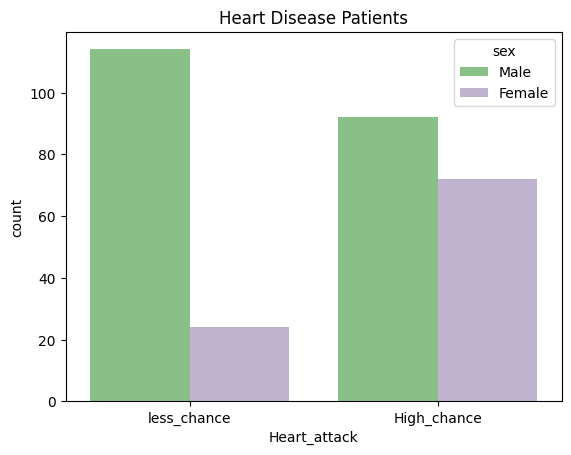

In [6]:

# Heart attack count in sex 
sns.countplot(data=data,x='Heart_attack',hue='sex',palette='Accent')
plt.title('Heart Disease Patients')
plt.show()

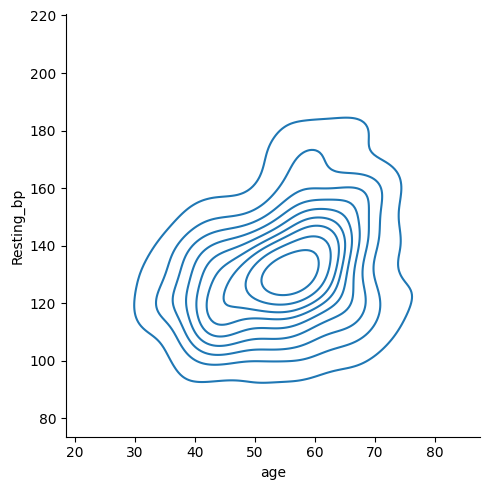

In [7]:
# distribution plot for the age and restiong bp 
sns.displot(data,x='age',y='Resting_bp',kind='kde')

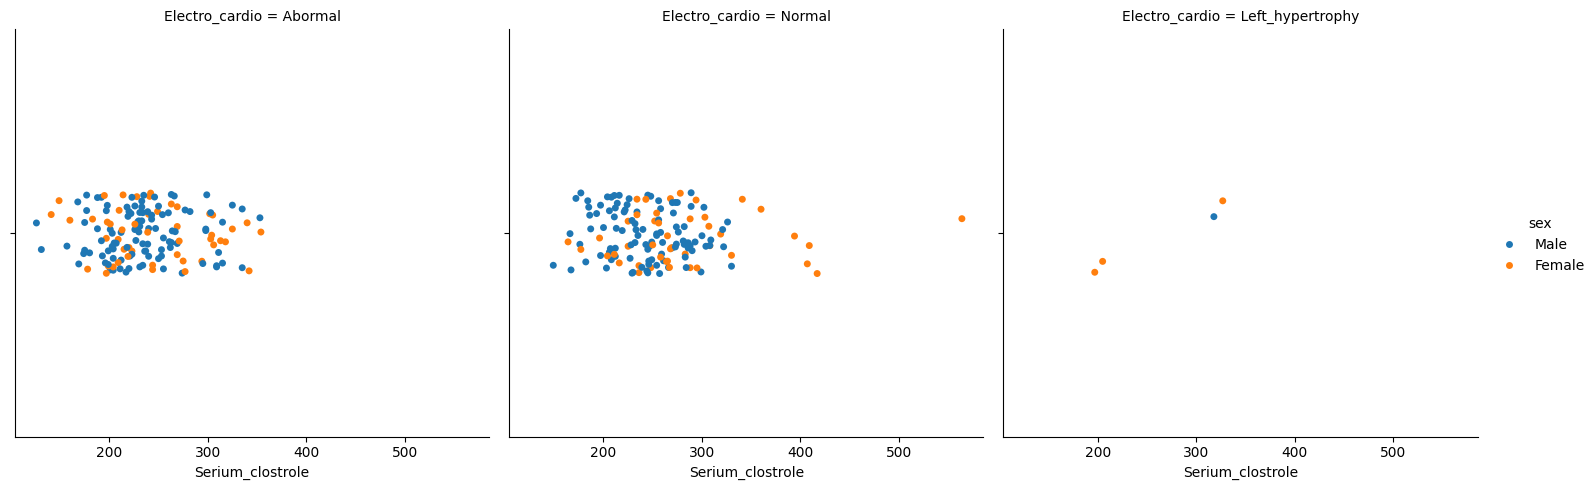

In [8]:
sns.catplot(data,col='Electro_cardio',hue='sex',x='Serium_clostrole',estimator='median',kind='strip')

<Axes: xlabel='Chest_pain', ylabel='count'>

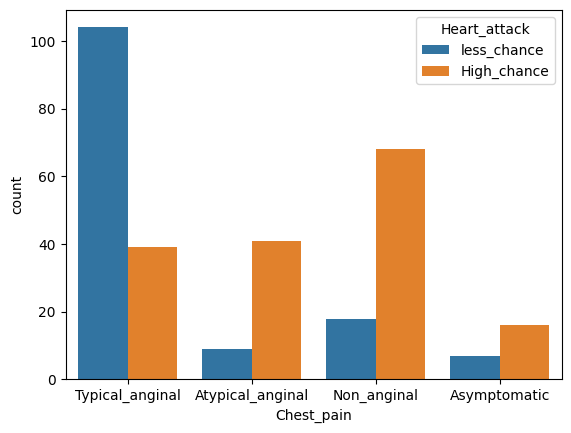

In [9]:
sns.countplot(data,x='Chest_pain',hue='Heart_attack')

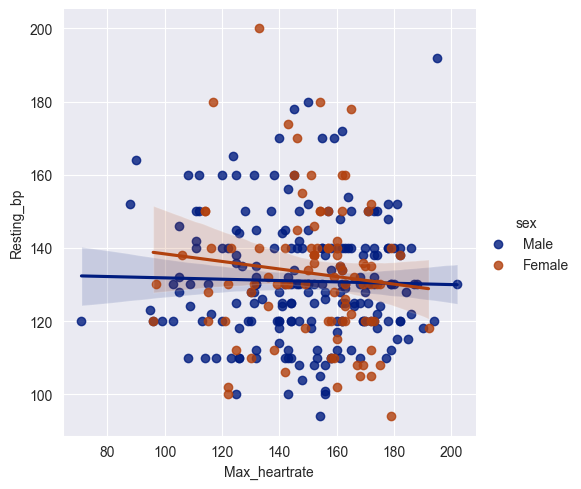

In [10]:
sns.set_style('darkgrid')
sns.lmplot(data=data,x='Max_heartrate',y='Resting_bp',hue='sex',palette='dark')
# data.columns

<Axes: xlabel='Resting_bp', ylabel='Density'>

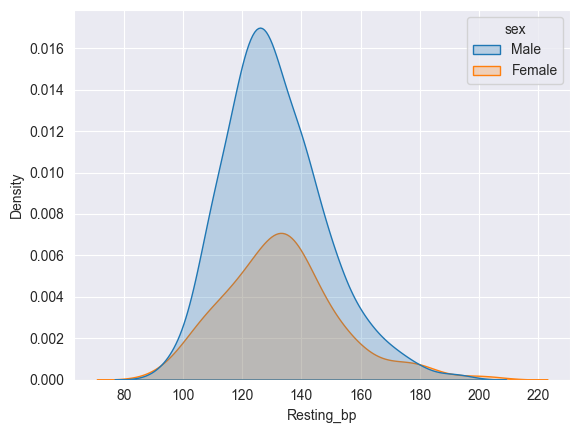

In [18]:
sns.kdeplot(data=data,x='Resting_bp',hue='sex',fill=True)

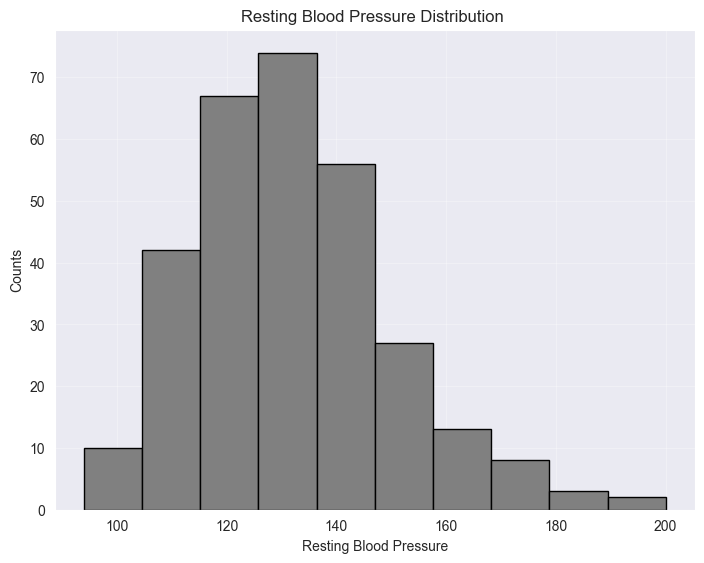

In [17]:

fig=plt.figure()
ax1=fig.add_axes((0,0,1,1))
ax1.hist(data['Resting_bp'],edgecolor='black',bins=10,color='Grey')
plt.grid(alpha=0.3)
plt.title('Resting Blood Pressure Distribution ')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Counts')
ax1.set_axisbelow(True)

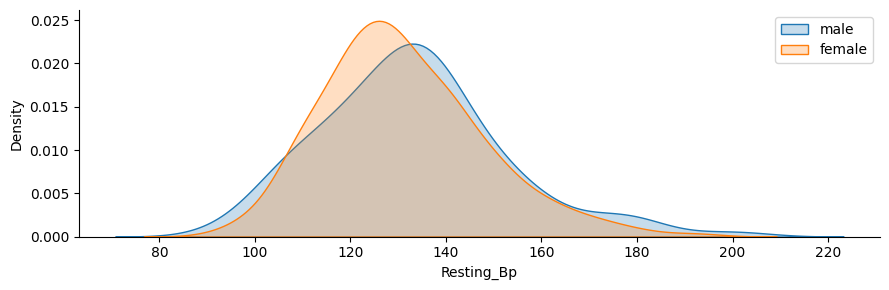

In [12]:
g=sns.FacetGrid(data=data,hue='sex',aspect=3)
print(g)
g.map(sns.kdeplot,'Resting_Bp',fill=True)
plt.legend(labels=('male','female'))
plt.show()